# Logistic Regression : 분류형 선형 모델

## Load the boston data set and check the features

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
dir(cancer)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
cancer.data.shape

(569, 30)

In [5]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
cancer.target[:40]   # 0: 음성, 1: 양성

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [7]:
p_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [8]:
p_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
p_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
p_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
p_cancer['Cancer_Y'] = cancer.target

In [12]:
p_cancer.corr()[25:]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer_Y
worst compactness,0.413463,0.277830,0.455774,0.390410,0.472468,0.865809,0.754968,0.667454,0.473200,0.458798,...,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455,-0.590998
worst concavity,0.526911,0.301025,0.563879,0.512606,0.434926,0.816275,0.884103,0.752399,0.433721,0.346234,...,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511,-0.659610
worst concave points,0.744214,0.295316,0.771241,0.722017,0.503053,0.815573,0.861323,0.910155,0.430297,0.175325,...,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114,-0.793566
worst symmetry,0.163953,0.105008,0.189115,0.143570,0.394309,0.510223,0.409464,0.375744,0.699826,0.334019,...,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848,-0.416294
worst fractal dimension,0.007066,0.119205,0.051019,0.003738,0.499316,0.687382,0.514930,0.368661,0.438413,0.767297,...,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000,-0.323872
Cancer_Y,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,0.012838,...,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872,1.000000


## Split the data and train the Model

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [15]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [16]:
print(y_train.shape)
print(y_test.shape)

(426,)
(143,)


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression(C=1.0 , max_iter=10000, random_state=0) # C=1.0 기본값

In [19]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
pred = lr.predict(X_test)
pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [21]:
print("Train Set Score: {:.3f}".format(lr.score(X_train, y_train)))
print("Test Set Score: {:.3f}".format(lr.score(X_test, y_test)))

Train Set Score: 0.960
Test Set Score: 0.951


## 여러가지 C값이나 규제 종류(L1,L2) 적용해 보기

### C 값을 가지고 독립변수에 규제를 제어 가능
#### L1 : 강한규제시 독립변수를 0으로 만들수 있음(없앨수 있음)
#### L2 : 강한규제시 독립변수를 0으로 가까이 가게 만듬(없앨수 없음)

In [22]:
c_list = [0.001,1.0, 100]
len(c_list)

3

In [23]:
c_list = [0.001,1.0, 100]
logstic_score_list = []
coef_list = []
for n in range(len(c_list)):
    lr = LogisticRegression(C=c_list[n] , penalty='l2', max_iter=10000, random_state=0)  # L2 규제 
    lr.fit(X_train, y_train)
    logstic_score = lr.score(X_test, y_test)
    logstic_score_list.append(logstic_score)
    coef_list.append(lr.coef_)

In [24]:
logstic_score_list

[0.9370629370629371, 0.951048951048951, 0.958041958041958]

In [25]:
coef_list

[array([[ 4.96267584e-04, -3.69728198e-02, -2.57423381e-02,
          2.35481483e-02, -2.97234334e-04, -9.25811149e-04,
         -1.31652542e-03, -5.56087883e-04, -5.93763039e-04,
         -1.19554104e-04, -5.25535119e-04, -1.97549176e-03,
         -6.28889961e-03, -4.41109186e-02, -2.69279974e-05,
         -1.58624801e-04, -2.67961291e-04, -8.11688830e-05,
         -8.49115606e-05, -1.01674951e-05, -1.05641087e-03,
         -6.43088365e-02, -5.87862875e-02, -2.16254173e-02,
         -5.52763423e-04, -3.18765595e-03, -4.10070137e-03,
         -1.20900742e-03, -1.37885894e-03, -3.73776284e-04]]),
 array([[ 0.60419221,  0.16808851, -0.14499115,  0.02186155, -0.15059667,
         -0.15493011, -0.3371604 , -0.21478906, -0.30590303, -0.02373629,
         -0.0230576 ,  1.03431944, -0.02691522, -0.1084916 , -0.01310472,
          0.08276786,  0.00901365, -0.02289565, -0.02626368,  0.01872263,
          0.29880771, -0.39370112, -0.22589197, -0.01042529, -0.2639853 ,
         -0.52784099, -1.10

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

[0.001, 1.0, 100]
[0.9370629370629371, 0.951048951048951, 0.958041958041958]


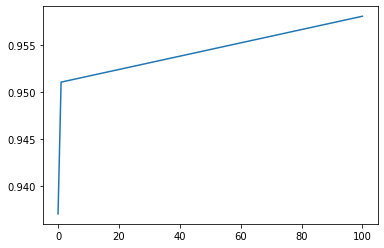

In [27]:
print(c_list)
print(logstic_score_list)
plt.plot(c_list,logstic_score_list)

In [28]:
coef_list

[array([[ 4.96267584e-04, -3.69728198e-02, -2.57423381e-02,
          2.35481483e-02, -2.97234334e-04, -9.25811149e-04,
         -1.31652542e-03, -5.56087883e-04, -5.93763039e-04,
         -1.19554104e-04, -5.25535119e-04, -1.97549176e-03,
         -6.28889961e-03, -4.41109186e-02, -2.69279974e-05,
         -1.58624801e-04, -2.67961291e-04, -8.11688830e-05,
         -8.49115606e-05, -1.01674951e-05, -1.05641087e-03,
         -6.43088365e-02, -5.87862875e-02, -2.16254173e-02,
         -5.52763423e-04, -3.18765595e-03, -4.10070137e-03,
         -1.20900742e-03, -1.37885894e-03, -3.73776284e-04]]),
 array([[ 0.60419221,  0.16808851, -0.14499115,  0.02186155, -0.15059667,
         -0.15493011, -0.3371604 , -0.21478906, -0.30590303, -0.02373629,
         -0.0230576 ,  1.03431944, -0.02691522, -0.1084916 , -0.01310472,
          0.08276786,  0.00901365, -0.02289565, -0.02626368,  0.01872263,
          0.29880771, -0.39370112, -0.22589197, -0.01042529, -0.2639853 ,
         -0.52784099, -1.10

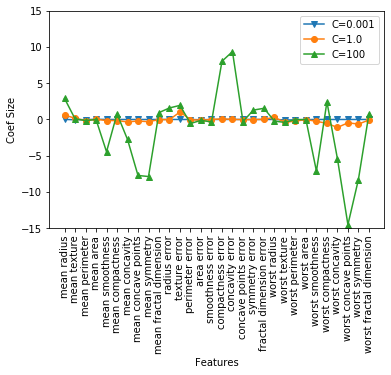

In [29]:
plt.plot(coef_list[0].T , marker='v', label="C=0.001")  # 강한 규제
plt.plot(coef_list[1].T , marker='o', label="C=1.0")    # 기본 규제
plt.plot(coef_list[2].T , marker='^', label="C=100")    # 약한 규제
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coef Size')
plt.ylim(-15, 15)
plt.legend()

In [30]:
print(coef_list[0].T.shape)
print(coef_list[1].T.shape)
print(coef_list[2].T.shape)

(30, 1)
(30, 1)
(30, 1)


In [31]:
c_list = [0.001,1.0, 100]
logstic_score_list = []
coef_list = []
for n in range(len(c_list)):
    lr = LogisticRegression(C=c_list[n] , penalty='l1', solver='saga', max_iter=10000, random_state=0)  # L1 규제 
    lr.fit(X_train, y_train)
    logstic_score = lr.score(X_test, y_test)
    logstic_score_list.append(logstic_score)
    coef_list.append(lr.coef_)

[0.001, 1.0, 100]
[0.916083916083916, 0.9370629370629371, 0.9370629370629371]


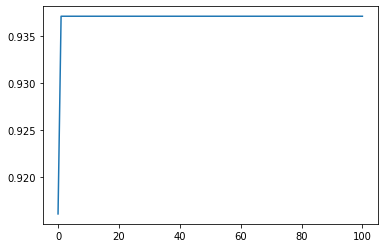

In [32]:
print(c_list)
print(logstic_score_list)
plt.plot(c_list,logstic_score_list)

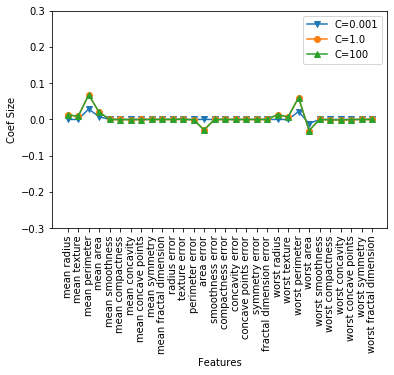

In [33]:
plt.plot(coef_list[0].T , marker='v', label="C=0.001")  # 강한 규제
plt.plot(coef_list[1].T , marker='o', label="C=1.0")    # 기본 규제
plt.plot(coef_list[2].T , marker='^', label="C=100")    # 약한 규제
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coef Size')
plt.ylim(-0.3, 0.3)
plt.legend()

In [34]:
print(coef_list[0].T.shape)
print(coef_list[1].T.shape)
print(coef_list[2].T.shape)

(30, 1)
(30, 1)
(30, 1)


In [35]:
coef_list[0]  # L! 강한규체(C=0.001)로  많은 독립변수가 0으로 됨.

array([[ 0.        ,  0.        ,  0.02877835,  0.00746119,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.02184604, -0.01141814,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [36]:
coef_list[1]

array([[ 1.27628667e-02,  8.52594383e-03,  6.76910379e-02,
         1.98298723e-02,  0.00000000e+00, -5.72842914e-05,
        -2.86393789e-04,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  6.42210922e-04,
        -1.04595381e-03, -2.85954601e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.33349642e-02,
         6.69078249e-03,  6.01811227e-02, -3.05480230e-02,
         0.00000000e+00, -7.71539975e-04, -1.15622105e-03,
        -1.59756069e-04,  0.00000000e+00,  0.00000000e+00]])

In [37]:
coef_list[2]

array([[ 1.29700362e-02,  8.68512780e-03,  6.77420232e-02,
         1.98714561e-02,  7.18357925e-05, -2.72723833e-04,
        -5.24054806e-04, -2.25230587e-04,  1.26292110e-04,
         7.77824155e-05,  4.71263854e-05,  8.73985090e-04,
        -1.21239451e-03, -2.87706588e-02,  2.68319936e-06,
        -5.43510922e-05, -7.06920362e-05, -1.79263046e-05,
         4.86449601e-06, -1.06109684e-06,  1.35433479e-02,
         6.82235623e-03,  6.02359622e-02, -3.06040106e-02,
         5.69977816e-05, -1.00247324e-03, -1.39389172e-03,
        -3.97478244e-04,  4.80148975e-05,  1.07270007e-05]])